# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [4]:
import pandas as pd

data = pd.read_excel("Online Retail.xlsx")

print(data.head())

print(data.info())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       -----------

## Task 2: Perform Data Cleaning

Checking for missing data


In [8]:
print(data.isnull().sum())
data = data.dropna(subset=["CustomerID", "Description"])
data = data.drop(columns=["ColumnToDrop"], errors="ignore")  # Replace with actual column name(s)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Task 3: Explore Basic Statistics

In [9]:
print(data.describe())
print(data['Country'].value_counts())


            Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark       

## Task 4: Data Visualization

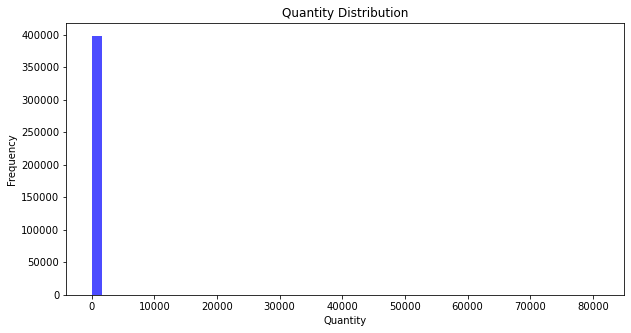

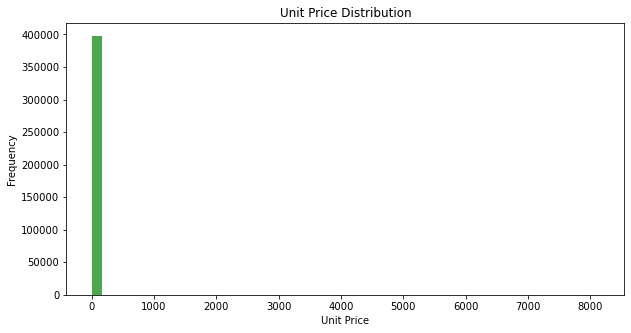

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(data['Quantity'], bins=50, color='blue', alpha=0.7)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(data['UnitPrice'], bins=50, color='green', alpha=0.7)
plt.title("Unit Price Distribution")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()




##  Task 5: Analyze Sales Trends Over Time

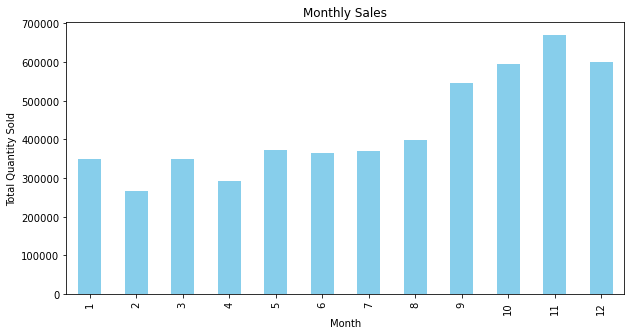

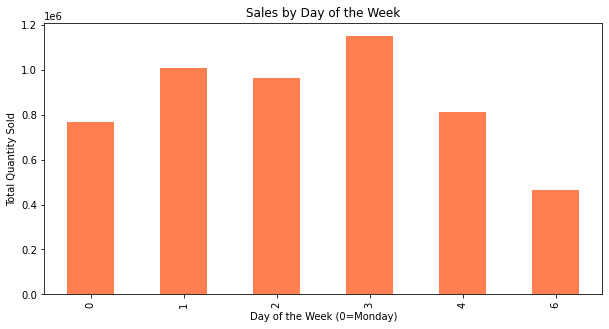

In [14]:
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek  # 0=Monday, 6=Sunday
monthly_sales = data.groupby('Month')['Quantity'].sum()
daily_sales = data.groupby('DayOfWeek')['Quantity'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.show()

plt.figure(figsize=(10, 5))
daily_sales.plot(kind='bar', color='coral')
plt.title("Sales by Day of the Week")
plt.xlabel("Day of the Week (0=Monday)")
plt.ylabel("Total Quantity Sold")
plt.show()


## Task 6: Explore Top-Selling Products and Countries

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


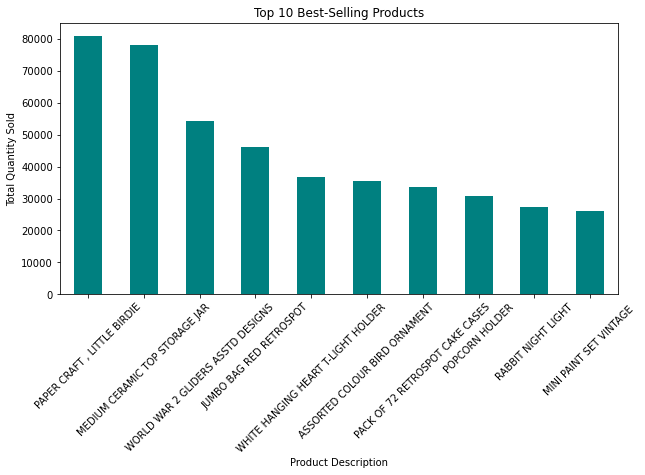

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Australia           83901
Sweden              36083
Switzerland         30082
Spain               27940
Japan               26016
Name: Quantity, dtype: int64


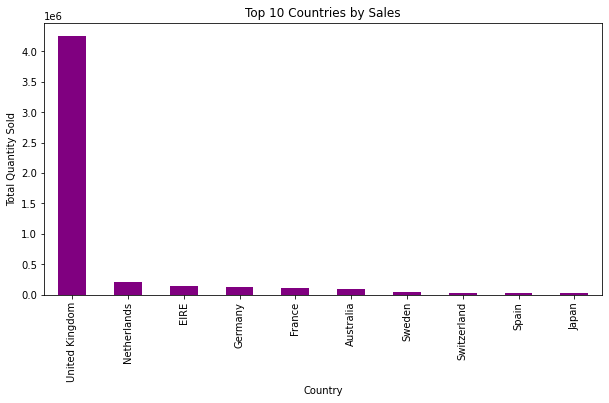

In [16]:
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Visualization
top_products.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

#top countries
top_countries = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_countries)

# Visualization
top_countries.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Quantity Sold")
plt.show()


## Task 7: Identify Outliers or Anomalies

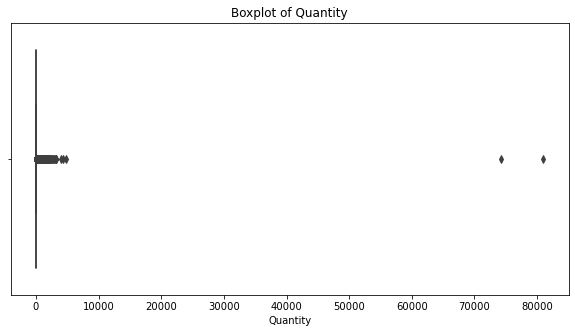

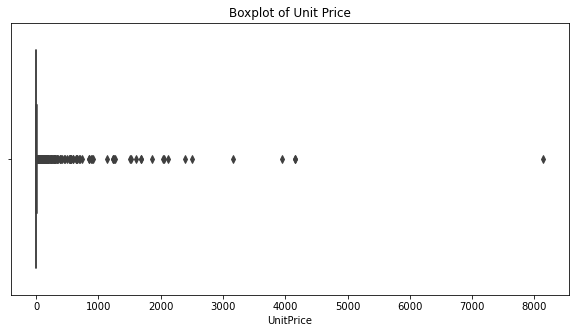

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data['Quantity'])
plt.title("Boxplot of Quantity")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data['UnitPrice'])
plt.title("Boxplot of Unit Price")
plt.show()



 ## Tsk 8: Draw Conclusions and Summarize Findings

## Seasonality in Sales:
* Sales peak in November, likely due to holiday shopping. Conversely, sales dip during mid-year months, suggesting a need for promotions or campaigns during slower periods.

## sales by Days of Week:
* Thursday is the peak day for sales, indicating that customers tend to make more purchases towards the end of the workweek, possibly in preparation for the weekend.

## Best-Selling Products:
* Products like "PAPER CRAFT , LITTLE BIRDIE" and "MEDIUM CERAMIC TOP STORAGE JAR" dominate sales, indicating customer preference for decorative and giftable items.

## Geographic Insights:
* The UK accounts for 84.6% of total sales, while other regions like Netherlands, EIRE, and Germany have relatively smaller contributions.

## Outliers:
* The dataset contains several outliers, indicative of large, bulk orders, potentially from corporate clients. These orders, while skewing average metrics, represent a valuable opportunity to explore tailored pricing strategies and foster long-term partnerships with corporate customers.

## Actionable Recommendations

**Leveraging Seasonality and Sales Patterns:**

* **Peak Season Planning:**
  * Increase inventory levels for top-selling products in advance of November to meet the surge in demand.
  * Implement effective supply chain strategies to ensure timely delivery during peak periods.
* **Off-Peak Promotions:**
  * Develop targeted marketing campaigns and discounts during slower mid-year months to stimulate sales.
  * Consider offering limited-time promotions or flash sales to attract customers.

**Customer-Centric Strategies:**

* **Personalized Marketing:**
  * Utilize customer purchase history to offer personalized product recommendations and targeted promotions.
  * Implement a loyalty program to reward repeat customers and encourage repeat purchases.
* **Geographic Focus:**
  * Continue to prioritize the UK market, as it accounts for the majority of sales. 
  * Explore opportunities to expand into other high-potential markets, such as Germany and Netherlands.

**Optimizing Product Portfolio:**

* **Product Innovation:**
  * Introduce new variants or complementary products for best-selling items to capitalize on customer preferences. 
  * Conduct market research to identify emerging trends and consumer needs.

**Data-Driven Decision Making:**

* **Outlier Analysis:**
  * Investigate outliers to identify potential bulk buyers and explore opportunities for tailored pricing and partnerships.
  * Implement data quality checks to ensure accurate reporting and analysis.

By implementing these recommendations, the business can capitalize on seasonal trends, enhance customer engagement, optimize product offerings, and drive sustainable growth.
